# Abbreviations :

Abbreviations
APACHE:
Acute Physiology and Chronic Health Evaluation

APS:
Acute Physiology Score

GI:
gastrointestinal

MPM:
Mortality Probability Model

PAC:
post-acute care

SAPS:
Simplified Acute Physiology Score.



```
# Time Series
These 37 variables may be observed once, more than once, or not at all in some cases:

Albumin (g/dL)
ALP [Alkaline phosphatase (IU/L)]
ALT [Alanine transaminase (IU/L)]
AST [Aspartate transaminase (IU/L)]
Bilirubin (mg/dL)
BUN [Blood urea nitrogen (mg/dL)]
Cholesterol (mg/dL)
Creatinine [Serum creatinine (mg/dL)]
DiasABP [Invasive diastolic arterial blood pressure (mmHg)]
FiO2 [Fractional inspired O2 (0-1)]
GCS [Glasgow Coma Score (3-15)]
Glucose [Serum glucose (mg/dL)]
HCO3 [Serum bicarbonate (mmol/L)]
HCT [Hematocrit (%)]
HR [Heart rate (bpm)]
K [Serum potassium (mEq/L)]
Lactate (mmol/L)
Mg [Serum magnesium (mmol/L)]
MAP [Invasive mean arterial blood pressure (mmHg)]
MechVent [Mechanical ventilation respiration (0:false, or 1:true)]
Na [Serum sodium (mEq/L)]
NIDiasABP [Non-invasive diastolic arterial blood pressure (mmHg)]
NIMAP [Non-invasive mean arterial blood pressure (mmHg)]
NISysABP [Non-invasive systolic arterial blood pressure (mmHg)]
PaCO2 [partial pressure of arterial CO2 (mmHg)]
PaO2 [Partial pressure of arterial O2 (mmHg)]
pH [Arterial pH (0-14)]
Platelets (cells/nL)
RespRate [Respiration rate (bpm)]
SaO2 [O2 saturation in hemoglobin (%)]
SysABP [Invasive systolic arterial blood pressure (mmHg)]
Temp [Temperature (°C)]
TropI [Troponin-I (μg/L)]
TropT [Troponin-T (μg/L)]
Urine [Urine output (mL)]
WBC [White blood cell count (cells/nL)]
Weight (kg)*
```



# Models

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import os
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [2]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

root_dir = "/content/gdrive/My Drive/Colab Notebooks/ICU Project/"
directory = root_dir + 'assets/'

Mounted at /content/gdrive


In [3]:
# Reading DataSet
df = pd.read_csv(directory + 'f_means_df.csv')

In [4]:
info_df = pd.read_csv(directory + 'info.csv')

In [5]:
extracted_col = info_df["Gender"]
df = df.join(extracted_col)

In [6]:
df.columns

Index(['RecordID', 'In-hospital_death', 'ICUType', 'Age', 'SOFA', 'SAPS-I',
       'Weight', 'HR', 'BUN', 'Creatinine', 'GCS', 'Temp', 'HCT', 'Platelets',
       'WBC', 'Na', 'HCO3', 'k', 'Mg', 'Glucose', 'Urine', 'NISysABP',
       'NIDiasABP', 'NIMAP', 'pH', 'PaCO2', 'PaO2', 'DiasABP', 'SysABP', 'MAP',
       'FiO2', 'MechVent', 'Lactate', 'Gender'],
      dtype='object')

 **1-Applying SVM without handling the imbalanced class distribution**

In [7]:
X = df.drop('In-hospital_death', axis=1)
y = df['In-hospital_death']

In [8]:
# Split the data into test and train sets

from sklearn.model_selection import train_test_split
  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 20)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (2800, 33)
Number transactions y_train dataset:  (2800,)
Number transactions X_test dataset:  (1200, 33)
Number transactions y_test dataset:  (1200,)


In [9]:
#  training the model without handling the imbalanced class distribution

from sklearn.svm import SVC
svclassifier = SVC(kernel='rbf')
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
print("area under curve (auc): ", metrics.roc_auc_score(y_test,y_pred))
print('-------------------------------------------------------------------------')
print(confusion_matrix(y_test,y_pred))
print('-------------------------------------------------------------------------')
print(classification_report(y_test,y_pred))



area under curve (auc):  0.5
-------------------------------------------------------------------------
[[1040    0]
 [ 160    0]]
-------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      1.00      0.93      1040
           1       0.00      0.00      0.00       160

    accuracy                           0.87      1200
   macro avg       0.43      0.50      0.46      1200
weighted avg       0.75      0.87      0.80      1200



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))




```
# The recall of the minority class is zero. It proves that the model is more biased towards majority class. And the classifier did nothing.
```



**2-Using SMOTE technique to overSample the minority class**

In [10]:
# Using SMOTE Algorithm to handle the imbalance of the data

print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))
  
# import SMOTE module from imblearn library
# pip install imblearn (if you don't have imblearn in your system)
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 20)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))



Before OverSampling, counts of label '1': 394
Before OverSampling, counts of label '0': 2406 

After OverSampling, the shape of train_X: (4812, 33)
After OverSampling, the shape of train_y: (4812,) 

After OverSampling, counts of label '1': 2406
After OverSampling, counts of label '0': 2406




```
# SMOTE Algorithm has oversampled the minority instances and made it equal to majority class.
```



**3- Repeating SVM after applying SMOTE technique**

In [11]:
# Repeating SVM after applying SMOTE technique
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

random_state =[10,20,30,40,50,60,70]
for r in random_state:
  svclassifier = SVC(kernel='rbf',random_state=r)
  svclassifier.fit(X_train_res, y_train_res)
  y_pred = svclassifier.predict(X_test)
  from sklearn import metrics
  print("area under curve (auc): ", metrics.roc_auc_score(y_test,y_pred))
  print('-------------------------------------------------------------------------')
  print(confusion_matrix(y_test,y_pred))
  print(classification_report(y_test,y_pred))



area under curve (auc):  0.48317307692307687
-------------------------------------------------------------------------
[[498 542]
 [ 82  78]]
              precision    recall  f1-score   support

           0       0.86      0.48      0.61      1040
           1       0.13      0.49      0.20       160

    accuracy                           0.48      1200
   macro avg       0.49      0.48      0.41      1200
weighted avg       0.76      0.48      0.56      1200

area under curve (auc):  0.48317307692307687
-------------------------------------------------------------------------
[[498 542]
 [ 82  78]]
              precision    recall  f1-score   support

           0       0.86      0.48      0.61      1040
           1       0.13      0.49      0.20       160

    accuracy                           0.48      1200
   macro avg       0.49      0.48      0.41      1200
weighted avg       0.76      0.48      0.56      1200

area under curve (auc):  0.48317307692307687
-----------------



```
# The recall value of the minority class has improved to 49%
```




**4- Apply SVM-PCA after Applying SMOTE**


In [12]:
# Apply SVM-PCA after Applying SMOTE
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

random_state =[10,20,30,40,50,60,70]
for r in random_state:

      pca = PCA(n_components=15, whiten=True, random_state=r)
      svc = SVC(kernel='rbf', class_weight='balanced')
      model = make_pipeline(pca, svc)

      from sklearn.preprocessing import StandardScaler

      scaler = StandardScaler()
      scaled_X_train = scaler.fit_transform(X_train_res)
      scaled_X_test = scaler.transform(X_test)

      from sklearn.model_selection import GridSearchCV
      param_grid = {'svc__C': [1, 5, 10, 50],
                    'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
      grid = GridSearchCV(model, param_grid)

      %time grid.fit(scaled_X_train, y_train_res)
      print(grid.best_params_)

      model = grid.best_estimator_
      ypred = model.predict(scaled_X_test)
      from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
      from sklearn import metrics
      print("area under curve (auc): ", metrics.roc_auc_score(y_test,y_pred))
      print('-------------------------------------------------------------------------')
      print(accuracy_score(y_test,ypred))
      print(confusion_matrix(y_test,ypred))
      print(classification_report(y_test,ypred))


CPU times: user 1min 1s, sys: 16.9 s, total: 1min 18s
Wall time: 59.1 s
{'svc__C': 50, 'svc__gamma': 0.005}
area under curve (auc):  0.48317307692307687
-------------------------------------------------------------------------
0.7983333333333333
[[837 203]
 [ 39 121]]
              precision    recall  f1-score   support

           0       0.96      0.80      0.87      1040
           1       0.37      0.76      0.50       160

    accuracy                           0.80      1200
   macro avg       0.66      0.78      0.69      1200
weighted avg       0.88      0.80      0.82      1200

CPU times: user 1min 1s, sys: 16.9 s, total: 1min 18s
Wall time: 59.5 s
{'svc__C': 50, 'svc__gamma': 0.005}
area under curve (auc):  0.48317307692307687
-------------------------------------------------------------------------
0.7983333333333333
[[837 203]
 [ 39 121]]
              precision    recall  f1-score   support

           0       0.96      0.80      0.87      1040
           1       0.37   



```
# The accuarcy and recall has improved.
```



**5- Applying RandomForest after Applying SMOTE**

In [13]:
# Applying RandomForest after Applying SMOTE
# load library
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

random_state =[10,20,30,40,50,60,70]
for r in random_state:
    rfc = RandomForestClassifier(random_state=r)

    # fit the predictor and target
    rfc.fit(X_train_res, y_train_res)

    # predict
    rfc_predict = rfc.predict(X_test)# check performance
    print('ROCAUC score:',roc_auc_score(y_test, rfc_predict))
    print('Accuracy score:',accuracy_score(y_test, rfc_predict))
    print('F1 score:',f1_score(y_test, rfc_predict))
    print('F1 score macro-average:', f1_score(y_test, rfc_predict, average='macro'))
    print("---------------------------------------------")

ROCAUC score: 0.8497596153846154
Accuracy score: 0.9
F1 score: 0.6756756756756757
F1 score macro-average: 0.8082811875915323
---------------------------------------------
ROCAUC score: 0.8466346153846153
Accuracy score: 0.8991666666666667
F1 score: 0.6720867208672088
F1 score macro-average: 0.8062550787989416
---------------------------------------------
ROCAUC score: 0.8406250000000001
Accuracy score: 0.9025
F1 score: 0.6740947075208913
F1 score macro-average: 0.80838493337828
---------------------------------------------
ROCAUC score: 0.8603365384615383
Accuracy score: 0.9
F1 score: 0.6825396825396826
F1 score macro-average: 0.8115962507653902
---------------------------------------------
ROCAUC score: 0.8367788461538462
Accuracy score: 0.8958333333333334
F1 score: 0.6594005449591281
F1 score macro-average: 0.7989575277673162
---------------------------------------------
ROCAUC score: 0.8456730769230768
Accuracy score: 0.8975
F1 score: 0.6684636118598383
F1 score macro-average: 0.803



```
                                                  # Under Sampling (Near-Miss)
```



### **1- Appling NearMiss technique to Under-sample the majority class and see its accuracy and recall results.**

In [14]:
print("Before Undersampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before Undersampling, counts of label '0': {} \n".format(sum(y_train == 0)))
  
# apply near miss
from imblearn.under_sampling import NearMiss
nr = NearMiss()
  
X_train_miss, y_train_miss = nr.fit_resample(X_train, y_train.ravel())
  
print('After Undersampling, the shape of train_X: {}'.format(X_train_miss.shape))
print('After Undersampling, the shape of train_y: {} \n'.format(y_train_miss.shape))
  
print("After Undersampling, counts of label '1': {}".format(sum(y_train_miss == 1)))
print("After Undersampling, counts of label '0': {}".format(sum(y_train_miss == 0)))

Before Undersampling, counts of label '1': 394
Before Undersampling, counts of label '0': 2406 

After Undersampling, the shape of train_X: (788, 33)
After Undersampling, the shape of train_y: (788,) 

After Undersampling, counts of label '1': 394
After Undersampling, counts of label '0': 394




```
# The NearMiss Algorithm has undersampled the majority instances and made it equal to majority class.
```

 

**2- Apply SVM after applying NearMiss**

In [15]:
from sklearn.svm import SVC
random_state =[10,20,30,40,50,60,70]
for r in random_state:
    svclassifier = SVC(kernel='rbf',random_state=r)
    svclassifier.fit(X_train_miss, y_train_miss)
    y_pred = svclassifier.predict(X_test)
    from sklearn.metrics import classification_report, confusion_matrix
    from sklearn import metrics
    print("area under curve (auc): ", metrics.roc_auc_score(y_test,y_pred))
    print('-------------------------------------------------------------------------')
    print(confusion_matrix(y_test,y_pred))
    print(classification_report(y_test,y_pred))
    print('----------------------------------')

area under curve (auc):  0.4677884615384616
-------------------------------------------------------------------------
[[505 535]
 [ 88  72]]
              precision    recall  f1-score   support

           0       0.85      0.49      0.62      1040
           1       0.12      0.45      0.19       160

    accuracy                           0.48      1200
   macro avg       0.49      0.47      0.40      1200
weighted avg       0.75      0.48      0.56      1200

----------------------------------
area under curve (auc):  0.4677884615384616
-------------------------------------------------------------------------
[[505 535]
 [ 88  72]]
              precision    recall  f1-score   support

           0       0.85      0.49      0.62      1040
           1       0.12      0.45      0.19       160

    accuracy                           0.48      1200
   macro avg       0.49      0.47      0.40      1200
weighted avg       0.75      0.48      0.56      1200

-----------------------------



```
# The accuarcy slightly increased to 51%
```



**3- Apply SVM-PCA after Applying NearMiss**

In [16]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

random_state =[10,20,30,40,50,60,70]
for r in random_state:

    pca = PCA(n_components=15, whiten=True, random_state=r)
    svc = SVC(kernel='rbf', class_weight='balanced')
    model = make_pipeline(pca, svc)

    from sklearn.preprocessing import StandardScaler

    scaler = StandardScaler()
    scaled_X_train = scaler.fit_transform(X_train_miss)
    scaled_X_test = scaler.transform(X_test)

    from sklearn.model_selection import GridSearchCV
    param_grid = {'svc__C': [1, 5, 10, 50],
                  'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
    grid = GridSearchCV(model, param_grid)

    %time grid.fit(scaled_X_train, y_train_miss)
    print(grid.best_params_)

    model = grid.best_estimator_
    ypred = model.predict(scaled_X_test)
    from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
    from sklearn import metrics
    print("area under curve (auc): ", metrics.roc_auc_score(y_test,y_pred))
    print('-------------------------------------------------------------------------')
    print(accuracy_score(y_test,ypred))
    print(confusion_matrix(y_test,ypred))
    print(classification_report(y_test,ypred))
    print('------------------------------------------')

CPU times: user 3.75 s, sys: 2.8 s, total: 6.54 s
Wall time: 3.36 s
{'svc__C': 50, 'svc__gamma': 0.005}
area under curve (auc):  0.4677884615384616
-------------------------------------------------------------------------
0.69
[[705 335]
 [ 37 123]]
              precision    recall  f1-score   support

           0       0.95      0.68      0.79      1040
           1       0.27      0.77      0.40       160

    accuracy                           0.69      1200
   macro avg       0.61      0.72      0.59      1200
weighted avg       0.86      0.69      0.74      1200

------------------------------------------
CPU times: user 3.71 s, sys: 2.75 s, total: 6.46 s
Wall time: 3.28 s
{'svc__C': 50, 'svc__gamma': 0.005}
area under curve (auc):  0.4677884615384616
-------------------------------------------------------------------------
0.69
[[706 334]
 [ 38 122]]
              precision    recall  f1-score   support

           0       0.95      0.68      0.79      1040
           1       0

**```
Using SVM with PCA gives us better recall results in both classes and better accuarcy.
```**

**4- Applying RandomForest Classifier after applying NearMiss**

In [17]:
# load library
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
random_state =[10,20,30,40,50,60,70]
for r in random_state:
    rfc = RandomForestClassifier(random_state=r)

    # fit the predictor and target
    rfc.fit(X_train_miss, y_train_miss)

    # predict
    rfc_predict = rfc.predict(X_test)# check performance
    print('ROCAUC score:',roc_auc_score(y_test, rfc_predict))
    print('Accuracy score:',accuracy_score(y_test, rfc_predict))
    print('F1 score:',f1_score(y_test, rfc_predict))
    print('F1 score macro-average:', f1_score(y_test, rfc_predict, average='macro'))
    print('-------------------------------------------------------')

ROCAUC score: 0.8685096153846155
Accuracy score: 0.85
F1 score: 0.6137339055793992
F1 score macro-average: 0.7603312754370626
-------------------------------------------------------
ROCAUC score: 0.8415865384615384
Accuracy score: 0.84
F1 score: 0.5844155844155844
F1 score macro-average: 0.742672188492622
-------------------------------------------------------
ROCAUC score: 0.8524038461538461
Accuracy score: 0.845
F1 score: 0.5974025974025974
F1 score macro-average: 0.7507136826022275
-------------------------------------------------------
ROCAUC score: 0.8567307692307692
Accuracy score: 0.8433333333333334
F1 score: 0.5982905982905983
F1 score macro-average: 0.750491054838881
-------------------------------------------------------
ROCAUC score: 0.8545673076923076
Accuracy score: 0.8441666666666666
F1 score: 0.5978494623655914
F1 score macro-average: 0.7506043177461033
-------------------------------------------------------
ROCAUC score: 0.8574519230769231
Accuracy score: 0.830833333333




```
# LDA, NBayes, Logistic Regression with OverSampling
```







In [18]:
xl = df.drop('In-hospital_death', axis=1)
yl = df['In-hospital_death']

In [19]:
from sklearn.model_selection import train_test_split
Xl_train, Xl_test, yl_train, yl_test = train_test_split(xl, yl, test_size = 0.3, random_state = 0)

In [20]:
# Using SMOTE Algorithm to handle the imbalance of the data

print("Before OverSampling, counts of label '1': {}".format(sum(yl_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(yl_train == 0)))
  
# import SMOTE module from imblearn library
# pip install imblearn (if you don't have imblearn in your system)
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 20)
Xl_train_res, yl_train_res = sm.fit_resample(Xl_train, yl_train.ravel())
  
print('After OverSampling, the shape of train_X: {}'.format(Xl_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(yl_train_res.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(yl_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(yl_train_res == 0)))

Before OverSampling, counts of label '1': 378
Before OverSampling, counts of label '0': 2422 

After OverSampling, the shape of train_X: (4844, 33)
After OverSampling, the shape of train_y: (4844,) 

After OverSampling, counts of label '1': 2422
After OverSampling, counts of label '0': 2422


**1- Logistic regression after oversampling the data (SMOOT) :**

In [21]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(Xl_train_res)
xtest = sc_x.transform(Xl_test)
 
#print (xtrain[0:10, :])
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(Xl_train_res, yl_train_res)

y_pred = classifier.predict(Xl_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(yl_test, y_pred)
 
print ("Confusion Matrix : \n", cm)
from sklearn.metrics import accuracy_score
from sklearn import metrics
print("area under curve (auc): ", metrics.roc_auc_score(y_test,y_pred))
print('-------------------------------------------------------------------------')
print ("Accuracy : ", accuracy_score(yl_test, y_pred))

Confusion Matrix : 
 [[717 307]
 [ 50 126]]
area under curve (auc):  0.5442307692307693
-------------------------------------------------------------------------
Accuracy :  0.7025


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,




```
# True Positive + True Negative = 837 + 133
  False Positive + False Negative = 187 + 47
  Performance measure – Accuracy 
```



**2- Linear Disciminant Analysis (LDA) after Oversampling the data:**

In [22]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
#Fit the LDA model
model = LinearDiscriminantAnalysis()
model.fit(Xl_train_res,yl_train_res)
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
#Define method to evaluate model
cv = RepeatedStratifiedKFold(n_splits=20, n_repeats=5, random_state=1)

#evaluate model
scores = cross_val_score(model, Xl_train_res, yl_train_res, scoring='accuracy', cv=cv, n_jobs=-1)
scores_f1 = cross_val_score(model, X_train_miss, y_train_miss, scoring='f1', cv=cv, n_jobs=-1)

print(scores)
print(scores_f1)
print(np.median(scores)) 
print(np.median(scores_f1))   

[0.86419753 0.8600823  0.85185185 0.82716049 0.88016529 0.79752066
 0.82644628 0.87190083 0.87190083 0.82644628 0.83884298 0.85950413
 0.78099174 0.82231405 0.84297521 0.80991736 0.83471074 0.83057851
 0.8553719  0.82644628 0.81893004 0.81893004 0.83950617 0.81893004
 0.84297521 0.89256198 0.84710744 0.87603306 0.81818182 0.87603306
 0.80165289 0.80165289 0.84710744 0.88016529 0.83884298 0.82644628
 0.80578512 0.83471074 0.86363636 0.84297521 0.82716049 0.85596708
 0.85185185 0.82716049 0.87190083 0.83884298 0.79338843 0.86363636
 0.84297521 0.83471074 0.82231405 0.81404959 0.86363636 0.81818182
 0.84710744 0.81818182 0.85123967 0.83884298 0.85950413 0.83884298
 0.84773663 0.8600823  0.85596708 0.82716049 0.82231405 0.89669421
 0.81404959 0.82231405 0.85950413 0.80578512 0.83057851 0.83884298
 0.85950413 0.7892562  0.82644628 0.85123967 0.85950413 0.83471074
 0.84297521 0.83471074 0.84773663 0.79012346 0.85185185 0.83539095
 0.82231405 0.85950413 0.82644628 0.88429752 0.82231405 0.8801

**3- Gaussian Naive Bayes after overSampling the data (SMOOT):**

In [23]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(Xl_train_res, yl_train_res)

#Predict the response for test dataset
y_pred = gnb.predict(Xl_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

print("area under curve (auc): ", metrics.roc_auc_score(yl_test,y_pred))
print('-------------------------------------------------------------------------')
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(yl_test, y_pred))

area under curve (auc):  0.6685014204545454
-------------------------------------------------------------------------
Accuracy: 0.5466666666666666


# **LDA, NBayes, Logistic Regression with UnderSampling**:

In [24]:
xl = df.drop('In-hospital_death', axis=1)
yl = df['In-hospital_death']

In [25]:
from sklearn.model_selection import train_test_split
Xu_train, Xu_test, yu_train, yu_test = train_test_split(xl, yl, test_size = 0.3, random_state = 0)

In [26]:
print("Before Undersampling, counts of label '1': {}".format(sum(yu_train == 1)))
print("Before Undersampling, counts of label '0': {} \n".format(sum(yu_train == 0)))
  
# apply near miss
from imblearn.under_sampling import NearMiss
nr = NearMiss()
  
X_train_miss, y_train_miss = nr.fit_resample(Xu_train, yu_train.ravel())
  
print('After Undersampling, the shape of train_X: {}'.format(X_train_miss.shape))
print('After Undersampling, the shape of train_y: {} \n'.format(y_train_miss.shape))
  
print("After Undersampling, counts of label '1': {}".format(sum(y_train_miss == 1)))
print("After Undersampling, counts of label '0': {}".format(sum(y_train_miss == 0)))

Before Undersampling, counts of label '1': 378
Before Undersampling, counts of label '0': 2422 

After Undersampling, the shape of train_X: (756, 33)
After Undersampling, the shape of train_y: (756,) 

After Undersampling, counts of label '1': 378
After Undersampling, counts of label '0': 378


**1- Logistic regression after undersampling the data:**

In [27]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(X_train_miss)
xtest = sc_x.transform(Xu_test)
 
#print (xtrain[0:10, :])
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train_miss, y_train_miss)

y_pred = classifier.predict(Xu_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(yu_test, y_pred)
 
print ("Confusion Matrix : \n", cm)
from sklearn import metrics
print("area under curve (auc): ", metrics.roc_auc_score(yu_test,y_pred))
print('-------------------------------------------------------------------------')
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(yu_test, y_pred))

print('F1 score macro-average:', metrics.f1_score(yu_test, y_pred, average='macro'))

Confusion Matrix : 
 [[558 466]
 [ 68 108]]
area under curve (auc):  0.5792791193181819
-------------------------------------------------------------------------
Accuracy :  0.555
F1 score macro-average: 0.4821818181818182


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


**2- Linear Disciminant Analysis (LDA) after undersampling :**

In [28]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
#Fit the LDA model
model = LinearDiscriminantAnalysis()
model.fit(X_train_miss,y_train_miss)
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
#Define method to evaluate model
cv = RepeatedStratifiedKFold(n_splits=20, n_repeats=5, random_state=1)

#evaluate model
scores = cross_val_score(model, X_train_miss, y_train_miss, scoring='accuracy', cv=cv, n_jobs=-1)
scores_f1 = cross_val_score(model, X_train_miss, y_train_miss, scoring='f1', cv=cv, n_jobs=-1)

print(scores)
print(scores_f1)
print(np.median(scores)) 
print(np.median(scores_f1))   

[0.78947368 0.81578947 0.92105263 0.76315789 0.84210526 0.76315789
 0.76315789 0.71052632 0.81578947 0.84210526 0.86842105 0.78947368
 0.92105263 0.78947368 0.84210526 0.84210526 0.56756757 0.7027027
 0.67567568 0.83783784 0.76315789 0.71052632 0.65789474 0.81578947
 0.84210526 0.81578947 0.76315789 0.73684211 0.84210526 0.86842105
 0.81578947 0.73684211 0.81578947 0.78947368 0.86842105 0.71052632
 0.75675676 0.86486486 0.86486486 0.75675676 0.78947368 0.65789474
 0.84210526 0.78947368 0.86842105 0.68421053 0.84210526 0.89473684
 0.78947368 0.84210526 0.84210526 0.92105263 0.71052632 0.81578947
 0.76315789 0.78947368 0.7027027  0.86486486 0.83783784 0.67567568
 0.84210526 0.84210526 0.78947368 0.84210526 0.76315789 0.78947368
 0.78947368 0.78947368 0.84210526 0.86842105 0.73684211 0.68421053
 0.81578947 0.81578947 0.65789474 0.73684211 0.83783784 0.83783784
 0.72972973 0.86486486 0.71052632 0.73684211 0.81578947 0.84210526
 0.89473684 0.76315789 0.71052632 0.78947368 0.86842105 0.76315

**3- Gaussian Naive Bayes after underSampling the data (NearMiss):**

In [29]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train_miss, y_train_miss)

#Predict the response for test dataset
y_pred = gnb.predict(Xl_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
print("area under curve (auc): ", metrics.roc_auc_score(yl_test,y_pred))
print('-------------------------------------------------------------------------')
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(yl_test, y_pred))

print('F1 score macro-average:', metrics.f1_score(yu_test, y_pred, average='macro'))

area under curve (auc):  0.67333984375
-------------------------------------------------------------------------
Accuracy: 0.7075
F1 score macro-average: 0.5966904100984431


# Feature Selection  techniques:

The performance of machine learning algorithms can degrade with too many input variables.

So far the model were trained on all features without focusing on the features 
that might affect directly the rate of Mortaility in the ICU.


**1 - Using ‘Pearson’ method to find the highly correlated features :** 

In [30]:
# Getting the features that are highly correlated with the In-hospital-death 
cor = df.corr(method ='pearson')
#Correlation with output variable
cor_target = abs(cor["In-hospital_death"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.14]
relevant_features

In-hospital_death    1.000000
SOFA                 0.177288
SAPS-I               0.156008
BUN                  0.224256
GCS                  0.221835
FiO2                 0.346808
MechVent             0.280123
Lactate              0.272493
Name: In-hospital_death, dtype: float64

In [31]:
# Creating a set of the 
lst =  df[['In-hospital_death','SOFA','SAPS-I', 'BUN', 'GCS', 'FiO2','MechVent','Lactate']]
df_pearson =lst.copy()

In [32]:
X_p = df_pearson.drop('In-hospital_death', axis=1)
y_p = df_pearson['In-hospital_death']

In [33]:
# Split the data into test and train sets

from sklearn.model_selection import train_test_split
  

Xp_train, Xp_test, yp_train, yp_test = train_test_split(X_p, y_p, test_size = 0.3, random_state = 20)


In [34]:
#  training the model without handling the imbalanced class distribution

from sklearn.svm import SVC
random_state =[10,20,30,40,50,60,70]
for r in random_state:
    rfc = RandomForestClassifier(random_state=r)
    svclassifier = SVC(kernel='rbf')
    svclassifier.fit(Xp_train, yp_train)
    yp_pred = svclassifier.predict(Xp_test)
    from sklearn.metrics import classification_report, confusion_matrix
    from sklearn import metrics
    print("area under curve (auc): ", metrics.roc_auc_score(yp_test,yp_pred))
    print('-------------------------------------------------------------------------')
    print(confusion_matrix(yp_test,yp_pred))
    print(classification_report(yp_test,yp_pred))
    print('----------------------------------------')
    print('F1 score macro-average:', metrics.f1_score(yp_test, yp_pred, average='macro'))

area under curve (auc):  0.503125
-------------------------------------------------------------------------
[[1040    0]
 [ 159    1]]
              precision    recall  f1-score   support

           0       0.87      1.00      0.93      1040
           1       1.00      0.01      0.01       160

    accuracy                           0.87      1200
   macro avg       0.93      0.50      0.47      1200
weighted avg       0.89      0.87      0.81      1200

----------------------------------------
F1 score macro-average: 0.4707042573908605
area under curve (auc):  0.503125
-------------------------------------------------------------------------
[[1040    0]
 [ 159    1]]
              precision    recall  f1-score   support

           0       0.87      1.00      0.93      1040
           1       1.00      0.01      0.01       160

    accuracy                           0.87      1200
   macro avg       0.93      0.50      0.47      1200
weighted avg       0.89      0.87      0.81    

In [35]:
# Using SMOTE Algorithm to handle the imbalance of the data

print("Before OverSampling, counts of label '1': {}".format(sum(yp_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(yp_train == 0)))
  
# import SMOTE module from imblearn library
# pip install imblearn (if you don't have imblearn in your system)
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 20)
Xp_train_res, yp_train_res = sm.fit_resample(Xp_train, yp_train.ravel())
  
print('After OverSampling, the shape of train_X: {}'.format(Xp_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(yp_train_res.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(yp_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(yp_train_res == 0)))


Before OverSampling, counts of label '1': 394
Before OverSampling, counts of label '0': 2406 

After OverSampling, the shape of train_X: (4812, 7)
After OverSampling, the shape of train_y: (4812,) 

After OverSampling, counts of label '1': 2406
After OverSampling, counts of label '0': 2406


**Repeating SVM after applying SMOTE and Feature Selection(Pearson)**

In [36]:
#Repeating SVM after applying SMOTE and Feature Selection
from sklearn.svm import SVC
random_state =[10,20,30,40,50,60,70]
for r in random_state:
    svclassifier = SVC(kernel='rbf',random_state=r)
    svclassifier.fit(Xp_train_res, yp_train_res)
    yp_pred = svclassifier.predict(Xp_test)
    from sklearn.metrics import classification_report, confusion_matrix
    from sklearn import metrics
    print("area under curve (auc): ", metrics.roc_auc_score(y_test,y_pred))
    print('-------------------------------------------------------------------------')
    print(confusion_matrix(yp_test,yp_pred))
    print(classification_report(yp_test,yp_pred))
    print('-----------------------------------------')
    print('F1 score macro-average:', metrics.f1_score(yp_test, yp_pred, average='macro'))

area under curve (auc):  0.515625
-------------------------------------------------------------------------
[[729 311]
 [ 44 116]]
              precision    recall  f1-score   support

           0       0.94      0.70      0.80      1040
           1       0.27      0.72      0.40       160

    accuracy                           0.70      1200
   macro avg       0.61      0.71      0.60      1200
weighted avg       0.85      0.70      0.75      1200

-----------------------------------------
F1 score macro-average: 0.5997109650066573
area under curve (auc):  0.515625
-------------------------------------------------------------------------
[[729 311]
 [ 44 116]]
              precision    recall  f1-score   support

           0       0.94      0.70      0.80      1040
           1       0.27      0.72      0.40       160

    accuracy                           0.70      1200
   macro avg       0.61      0.71      0.60      1200
weighted avg       0.85      0.70      0.75      1200


**Repeating SVM-PCA after applying SMOTE and Feature Selection (Pearson)**

In [37]:
# Repeating SVM-PCA after applying SMOTE and Feature Selection (Pearson)
# Apply SVM-PCA after Applying SMOTE
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
random_state =[10,20,30,40,50,60,70]
for r in random_state:
        
    pca = PCA(n_components=6, whiten=True, random_state=r)
    svc = SVC(kernel='rbf', class_weight='balanced')
    model = make_pipeline(pca, svc)

    from sklearn.preprocessing import StandardScaler

    scaler = StandardScaler()
    scaled_X_train = scaler.fit_transform(Xp_train_res)
    scaled_X_test = scaler.transform(Xp_test)

    from sklearn.model_selection import GridSearchCV
    param_grid = {'svc__C': [1, 5, 10, 50],
                  'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
    grid = GridSearchCV(model, param_grid)

    %time grid.fit(scaled_X_train, yp_train_res)
    print(grid.best_params_)

    model = grid.best_estimator_
    ypred = model.predict(scaled_X_test)
    from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
    from sklearn import metrics
    print("area under curve (auc): ", metrics.roc_auc_score(y_test,y_pred))
    print('-------------------------------------------------------------------------')
    print(accuracy_score(yp_test,ypred))
    print(confusion_matrix(yp_test,ypred))
    print(classification_report(yp_test,ypred))
    print('---------------------------------------')


CPU times: user 50.6 s, sys: 8.35 s, total: 58.9 s
Wall time: 49.6 s
{'svc__C': 50, 'svc__gamma': 0.005}
area under curve (auc):  0.515625
-------------------------------------------------------------------------
0.7591666666666667
[[779 261]
 [ 28 132]]
              precision    recall  f1-score   support

           0       0.97      0.75      0.84      1040
           1       0.34      0.82      0.48       160

    accuracy                           0.76      1200
   macro avg       0.65      0.79      0.66      1200
weighted avg       0.88      0.76      0.79      1200

---------------------------------------
CPU times: user 50.1 s, sys: 8.37 s, total: 58.5 s
Wall time: 49.1 s
{'svc__C': 50, 'svc__gamma': 0.005}
area under curve (auc):  0.515625
-------------------------------------------------------------------------
0.7591666666666667
[[779 261]
 [ 28 132]]
              precision    recall  f1-score   support

           0       0.97      0.75      0.84      1040
           1  

**Repeating RandomForest after applying SMOTE and Feature Selection(Pearson)**

In [38]:
#Repeating RandomForest after applying SMOTE and Feature Selection(Pearson)
# load library
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
random_state =[10,20,30,40,50,60,70]
for r in random_state:
    rfc = RandomForestClassifier(random_state=r)

    # fit the predictor and target
    rfc.fit(Xp_train_res, yp_train_res)

    # predict
    rfc_predict = rfc.predict(Xp_test)# check performance
    print('ROCAUC score:',roc_auc_score(yp_test, rfc_predict))
    print('Accuracy score:',accuracy_score(yp_test, rfc_predict))
    print('F1 score:',f1_score(yp_test, rfc_predict))
    print('---------------------------------------------')
    print('F1 score macro-average:', metrics.f1_score(yp_test, yp_pred, average='macro'))

ROCAUC score: 0.8096153846153846
Accuracy score: 0.8533333333333334
F1 score: 0.5769230769230769
---------------------------------------------
F1 score macro-average: 0.5997109650066573
ROCAUC score: 0.8052884615384616
Accuracy score: 0.8458333333333333
F1 score: 0.5647058823529413
---------------------------------------------
F1 score macro-average: 0.5997109650066573
ROCAUC score: 0.8139423076923077
Accuracy score: 0.8516666666666667
F1 score: 0.5781990521327014
---------------------------------------------
F1 score macro-average: 0.5997109650066573
ROCAUC score: 0.7961538461538462
Accuracy score: 0.8483333333333334
F1 score: 0.5603864734299516
---------------------------------------------
F1 score macro-average: 0.5997109650066573
ROCAUC score: 0.8043269230769231
Accuracy score: 0.8441666666666666
F1 score: 0.5620608899297423
---------------------------------------------
F1 score macro-average: 0.5997109650066573
ROCAUC score: 0.796875
Accuracy score: 0.845
F1 score: 0.5571428571428

**2- Using 'Kendall' method to find the highly Correlated Features**

In [39]:
# Getting the features that are highly correlated with the In-hospital-death 
cor1 = df.corr(method ='kendall')
#Correlation with output variable
cor1_target = abs(cor1["In-hospital_death"])
#Selecting highly correlated features
relevant_features = cor1_target[cor1_target>0.14]
relevant_features

In-hospital_death    1.000000
BUN                  0.187208
GCS                  0.171287
Urine                0.167680
FiO2                 0.245678
MechVent             0.280123
Lactate              0.227506
Name: In-hospital_death, dtype: float64

In [40]:
# Creating a set of the 
lst_1 =  df[['In-hospital_death', 'BUN', 'GCS', 'Urine','FiO2','MechVent','Lactate']]
df_kendall =lst_1.copy()

In [41]:
X_k = df_kendall.drop('In-hospital_death', axis=1)
y_k = df_kendall['In-hospital_death']

In [42]:
# Split the data into test and train sets

from sklearn.model_selection import train_test_split
  

Xk_train, Xk_test, yk_train, yk_test = train_test_split(X_k, y_k, test_size = 0.3, random_state = 20)


In [43]:
#  training the model without handling the imbalanced class distribution

from sklearn.svm import SVC
random_state =[10,20,30,40,50,60,70]
for r in random_state:
    svclassifier = SVC(kernel='rbf',random_state = r)
    svclassifier.fit(Xk_train, yk_train)
    yk_pred = svclassifier.predict(Xk_test)
    from sklearn.metrics import classification_report, confusion_matrix
    from sklearn import metrics
    print("area under curve (auc): ", metrics.roc_auc_score(y_test,y_pred))
    print('-------------------------------------------------------------------------')
    print(confusion_matrix(yk_test,yk_pred))
    print(classification_report(yk_test,yk_pred))
    print('----------------------------------------')

area under curve (auc):  0.515625
-------------------------------------------------------------------------
[[1040    0]
 [ 160    0]]
              precision    recall  f1-score   support

           0       0.87      1.00      0.93      1040
           1       0.00      0.00      0.00       160

    accuracy                           0.87      1200
   macro avg       0.43      0.50      0.46      1200
weighted avg       0.75      0.87      0.80      1200

----------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


area under curve (auc):  0.515625
-------------------------------------------------------------------------
[[1040    0]
 [ 160    0]]
              precision    recall  f1-score   support

           0       0.87      1.00      0.93      1040
           1       0.00      0.00      0.00       160

    accuracy                           0.87      1200
   macro avg       0.43      0.50      0.46      1200
weighted avg       0.75      0.87      0.80      1200

----------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


area under curve (auc):  0.515625
-------------------------------------------------------------------------
[[1040    0]
 [ 160    0]]
              precision    recall  f1-score   support

           0       0.87      1.00      0.93      1040
           1       0.00      0.00      0.00       160

    accuracy                           0.87      1200
   macro avg       0.43      0.50      0.46      1200
weighted avg       0.75      0.87      0.80      1200

----------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


area under curve (auc):  0.515625
-------------------------------------------------------------------------
[[1040    0]
 [ 160    0]]
              precision    recall  f1-score   support

           0       0.87      1.00      0.93      1040
           1       0.00      0.00      0.00       160

    accuracy                           0.87      1200
   macro avg       0.43      0.50      0.46      1200
weighted avg       0.75      0.87      0.80      1200

----------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


area under curve (auc):  0.515625
-------------------------------------------------------------------------
[[1040    0]
 [ 160    0]]
              precision    recall  f1-score   support

           0       0.87      1.00      0.93      1040
           1       0.00      0.00      0.00       160

    accuracy                           0.87      1200
   macro avg       0.43      0.50      0.46      1200
weighted avg       0.75      0.87      0.80      1200

----------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


area under curve (auc):  0.515625
-------------------------------------------------------------------------
[[1040    0]
 [ 160    0]]
              precision    recall  f1-score   support

           0       0.87      1.00      0.93      1040
           1       0.00      0.00      0.00       160

    accuracy                           0.87      1200
   macro avg       0.43      0.50      0.46      1200
weighted avg       0.75      0.87      0.80      1200

----------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


area under curve (auc):  0.515625
-------------------------------------------------------------------------
[[1040    0]
 [ 160    0]]
              precision    recall  f1-score   support

           0       0.87      1.00      0.93      1040
           1       0.00      0.00      0.00       160

    accuracy                           0.87      1200
   macro avg       0.43      0.50      0.46      1200
weighted avg       0.75      0.87      0.80      1200

----------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



```
# The classifier learned nothing as it is more biased towards the majority class

```



In [44]:
# Using SMOTE Algorithm to handle the imbalance of the data

print("Before OverSampling, counts of label '1': {}".format(sum(yk_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(yk_train == 0)))
  
# import SMOTE module from imblearn library
# pip install imblearn (if you don't have imblearn in your system)
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 20)
Xk_train_res, yk_train_res = sm.fit_resample(Xk_train, yk_train.ravel())
  
print('After OverSampling, the shape of train_X: {}'.format(Xk_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(yk_train_res.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(yk_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(yk_train_res == 0)))



Before OverSampling, counts of label '1': 394
Before OverSampling, counts of label '0': 2406 

After OverSampling, the shape of train_X: (4812, 6)
After OverSampling, the shape of train_y: (4812,) 

After OverSampling, counts of label '1': 2406
After OverSampling, counts of label '0': 2406




```
# Repeating SVM after applying SMOTE and Feature Selection(kendall)
```



**Repeating SVM after applying SMOTE and Feature Selection(Kendell)**

In [45]:
#Repeating SVM after applying SMOTE and Feature Selection
from sklearn.svm import SVC
random_state =[10,20,30,40,50,60,70]
for r in random_state:
    svclassifier = SVC(kernel='rbf',random_state=r)
    svclassifier.fit(Xk_train_res, yk_train_res)
    yk_pred = svclassifier.predict(Xk_test)
    from sklearn.metrics import classification_report, confusion_matrix
    from sklearn import metrics
    print("area under curve (auc): ", metrics.roc_auc_score(y_test,y_pred))
    print('-------------------------------------------------------------------------')
    print(confusion_matrix(yk_test,yk_pred))
    print(classification_report(yk_test,yk_pred))
    print('-------------------------------------------')

area under curve (auc):  0.515625
-------------------------------------------------------------------------
[[764 276]
 [ 52 108]]
              precision    recall  f1-score   support

           0       0.94      0.73      0.82      1040
           1       0.28      0.68      0.40       160

    accuracy                           0.73      1200
   macro avg       0.61      0.70      0.61      1200
weighted avg       0.85      0.73      0.77      1200

-------------------------------------------
area under curve (auc):  0.515625
-------------------------------------------------------------------------
[[764 276]
 [ 52 108]]
              precision    recall  f1-score   support

           0       0.94      0.73      0.82      1040
           1       0.28      0.68      0.40       160

    accuracy                           0.73      1200
   macro avg       0.61      0.70      0.61      1200
weighted avg       0.85      0.73      0.77      1200

----------------------------------------

**Repeating SVM-PCA after applying SMOTE and Feature Selection (Kendell)**





In [46]:
# Apply SVM-PCA after Applying SMOTE
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
random_state =[10,20,30,40,50,60,70]
for r in random_state:
    pca = PCA(n_components=6, whiten=True, random_state=r)
    svc = SVC(kernel='rbf', class_weight='balanced')
    model = make_pipeline(pca, svc)

    from sklearn.preprocessing import StandardScaler

    scaler = StandardScaler()
    scaled_X_train = scaler.fit_transform(Xk_train_res)
    scaled_X_test = scaler.transform(Xk_test)

    from sklearn.model_selection import GridSearchCV
    param_grid = {'svc__C': [1, 5, 10, 50],
                  'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
    grid = GridSearchCV(model, param_grid)

    %time grid.fit(scaled_X_train, yk_train_res)
    print(grid.best_params_)

    model = grid.best_estimator_
    ypred = model.predict(scaled_X_test)
    from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
    from sklearn import metrics
    print("area under curve (auc): ", metrics.roc_auc_score(y_test,y_pred))
    print('-------------------------------------------------------------------------')
    print(accuracy_score(yk_test,ypred))
    print(confusion_matrix(yk_test,ypred))
    print(classification_report(yk_test,ypred))
    print('---------------------------------------------------------------------------')

CPU times: user 51.2 s, sys: 8.39 s, total: 59.6 s
Wall time: 50.2 s
{'svc__C': 50, 'svc__gamma': 0.005}
area under curve (auc):  0.515625
-------------------------------------------------------------------------
0.7783333333333333
[[799 241]
 [ 25 135]]
              precision    recall  f1-score   support

           0       0.97      0.77      0.86      1040
           1       0.36      0.84      0.50       160

    accuracy                           0.78      1200
   macro avg       0.66      0.81      0.68      1200
weighted avg       0.89      0.78      0.81      1200

---------------------------------------------------------------------------
CPU times: user 52.1 s, sys: 8.25 s, total: 1min
Wall time: 51.1 s
{'svc__C': 50, 'svc__gamma': 0.005}
area under curve (auc):  0.515625
-------------------------------------------------------------------------
0.7783333333333333
[[799 241]
 [ 25 135]]
              precision    recall  f1-score   support

           0       0.97      0.77 



```
# Repeating RandomForest after applying SMOTE and Feature Selection(Kendell)
```



In [47]:
#Repeating RandomForest after applying SMOTE and Feature Selection(Pearson)
# load library
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
random_state =[10,20,30,40,50,60,70]
for r in random_state:
    rfc = RandomForestClassifier(random_state=r)

    # fit the predictor and target
    rfc.fit(Xk_train_res, yk_train_res)

    # predict
    rfc_predict = rfc.predict(Xk_test)# check performance
    print('ROCAUC score:',roc_auc_score(yk_test, rfc_predict))
    print('Accuracy score:',accuracy_score(yk_test, rfc_predict))
    print('F1 score:',f1_score(yk_test, rfc_predict))
    print('-----------------------------------------------------')
    print('F1 score macro-average:', metrics.f1_score(yk_test, rfc_predict, average='macro'))

ROCAUC score: 0.8014423076923077
Accuracy score: 0.83
F1 score: 0.5446428571428571
-----------------------------------------------------
F1 score macro-average: 0.7200673302107728
ROCAUC score: 0.7954326923076922
Accuracy score: 0.8333333333333334
F1 score: 0.54337899543379
-----------------------------------------------------
F1 score macro-average: 0.7207210981246421
ROCAUC score: 0.7983173076923077
Accuracy score: 0.8291666666666667
F1 score: 0.5413870246085011
-----------------------------------------------------
F1 score macro-average: 0.7182101533692787
ROCAUC score: 0.8086538461538462
Accuracy score: 0.8333333333333334
F1 score: 0.5535714285714286
-----------------------------------------------------
F1 score macro-average: 0.7255562060889931
ROCAUC score: 0.7983173076923077
Accuracy score: 0.8291666666666667
F1 score: 0.5413870246085011
-----------------------------------------------------
F1 score macro-average: 0.7182101533692787
ROCAUC score: 0.7978365384615385
Accuracy scor


# Investigating the mortaility rate per each ICU-Type



```
# ICUType (1: Coronary Care Unit, 2: Cardiac Surgery Recovery Unit,
           3: Medical ICU, or 4: Surgical ICU)
```



**1 - Cornary Care Unit**

In [48]:
df['ICUType'].value_counts()

3.0    1481
4.0    1068
2.0     874
1.0     577
Name: ICUType, dtype: int64



```
# Cornary Care Unit : ICU-Type =1
```



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


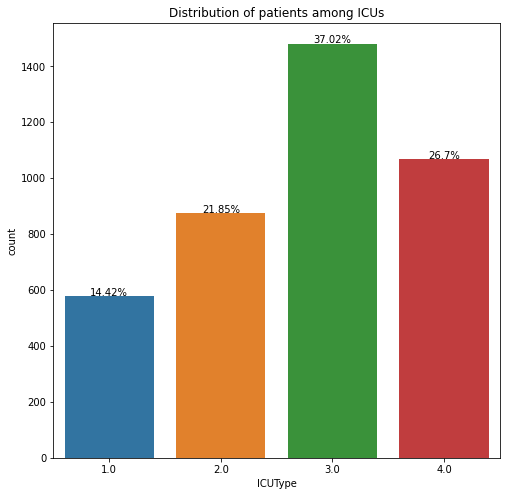

In [49]:
plt.figure(figsize = (8, 8))
ax = sns.countplot(df['ICUType'])
plt.title('Distribution of patients among ICUs')
for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2.0, height + 3,
                f"{round(100 * height / len(df), 2)}%",
                ha = 'center')

In [50]:
# splitting the dataframe into 2 parts

df_icu_1 = df[df['ICUType']== 1]


In [51]:
df_icu_1['In-hospital_death'].value_counts()

0    496
1     81
Name: In-hospital_death, dtype: int64

In [52]:
X_icu1 = df_icu_1.drop('In-hospital_death', axis=1)
y_icu1 = df_icu_1['In-hospital_death']



```
# PCA-SVM -> Stratify
```



In [53]:
# Split the data into test and train sets

from sklearn.model_selection import train_test_split
  

Xicu1_train, Xicu1_test, yicu1_train, yicu1_test = train_test_split(X_icu1,y_icu1 , test_size = 0.3, random_state = 20)


In [54]:
# Apply SVM-PCA 
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

pca = PCA(n_components=4, whiten=True, random_state=20)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(Xicu1_train)
scaled_X_test = scaler.transform(Xicu1_test)

from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(scaled_X_train, yicu1_train)
print(grid.best_params_)

model = grid.best_estimator_
ypred = model.predict(scaled_X_test)

CPU times: user 1.14 s, sys: 889 ms, total: 2.03 s
Wall time: 1.06 s
{'svc__C': 50, 'svc__gamma': 0.005}


In [55]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(accuracy_score(yicu1_test,ypred))
print(confusion_matrix(yicu1_test,ypred))
print(classification_report(yicu1_test,ypred))

0.7701149425287356
[[113  34]
 [  6  21]]
              precision    recall  f1-score   support

           0       0.95      0.77      0.85       147
           1       0.38      0.78      0.51        27

    accuracy                           0.77       174
   macro avg       0.67      0.77      0.68       174
weighted avg       0.86      0.77      0.80       174



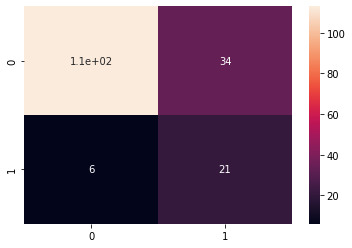

In [56]:
sns.heatmap(confusion_matrix(yicu1_test,ypred),annot=True)



```
# Coronary Care Unit(Type1) : stydying the mortai 
```



**2: Cardiac Surgery Recovery Unit**

In [57]:
df_icu_2 = df[df['ICUType']== 2]


In [58]:
X_icu2 = df_icu_2.drop('In-hospital_death', axis=1)
y_icu2 = df_icu_2['In-hospital_death']

In [59]:
# Split the data into test and train sets

from sklearn.model_selection import train_test_split
  

Xicu2_train, Xicu2_test, yicu2_train, yicu2_test = train_test_split(X_icu2,y_icu2 , test_size = 0.3, random_state = 20)


In [60]:
# Apply SVM-PCA 
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

pca = PCA(n_components=4, whiten=True, random_state=20)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(Xicu2_train)
scaled_X_test = scaler.transform(Xicu2_test)

from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(scaled_X_train, yicu2_train)
print(grid.best_params_)

model = grid.best_estimator_
ypred = model.predict(scaled_X_test)

CPU times: user 2.21 s, sys: 1.71 s, total: 3.92 s
Wall time: 2.03 s
{'svc__C': 1, 'svc__gamma': 0.001}


In [61]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(accuracy_score(yicu2_test,ypred))
print(confusion_matrix(yicu2_test,ypred))
print(classification_report(yicu2_test,ypred))

0.8288973384030418
[[214  40]
 [  5   4]]
              precision    recall  f1-score   support

           0       0.98      0.84      0.90       254
           1       0.09      0.44      0.15         9

    accuracy                           0.83       263
   macro avg       0.53      0.64      0.53       263
weighted avg       0.95      0.83      0.88       263



**3: Medical ICU**

In [62]:
df_icu_3 = df[df['ICUType']== 3]

In [63]:
X_icu3 = df_icu_3.drop('In-hospital_death', axis=1)
y_icu3 = df_icu_3['In-hospital_death']

In [64]:
# Split the data into test and train sets

from sklearn.model_selection import train_test_split
  

Xicu3_train, Xicu3_test, yicu3_train, yicu3_test = train_test_split(X_icu3,y_icu3 , test_size = 0.3, random_state = 20)


In [65]:
# Using SMOTE Algorithm to handle the imbalance of the data

print("Before OverSampling, counts of label '1': {}".format(sum(yicu3_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(yicu3_train == 0)))
  
# import SMOTE module from imblearn library
# pip install imblearn (if you don't have imblearn in your system)
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 20)
Xp3_train_res, yp3_train_res = sm.fit_resample(Xicu3_train, yicu3_train.ravel())
  
print('After OverSampling, the shape of train_X: {}'.format(Xp3_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(yp3_train_res.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(yp3_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(yp3_train_res == 0)))

Before OverSampling, counts of label '1': 195
Before OverSampling, counts of label '0': 841 

After OverSampling, the shape of train_X: (1682, 33)
After OverSampling, the shape of train_y: (1682,) 

After OverSampling, counts of label '1': 841
After OverSampling, counts of label '0': 841


In [66]:
# Apply SVM-PCA 
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

pca = PCA(n_components=4, whiten=True, random_state=20)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(Xp3_train_res)
scaled_X_test = scaler.transform(Xicu3_test)

from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(scaled_X_train, yp3_train_res)
print(grid.best_params_)

model = grid.best_estimator_
ypred = model.predict(scaled_X_test)

CPU times: user 12.5 s, sys: 8.34 s, total: 20.8 s
Wall time: 11.3 s
{'svc__C': 50, 'svc__gamma': 0.005}


In [67]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(accuracy_score(yicu3_test,ypred))
print(confusion_matrix(yicu3_test,ypred))
print(classification_report(yicu3_test,ypred))

0.6943820224719102
[[250 115]
 [ 21  59]]
              precision    recall  f1-score   support

           0       0.92      0.68      0.79       365
           1       0.34      0.74      0.46        80

    accuracy                           0.69       445
   macro avg       0.63      0.71      0.63       445
weighted avg       0.82      0.69      0.73       445



**4: Surgical ICU**

In [68]:
df_icu_4 = df[df['ICUType']== 4]

In [69]:
X_icu4 = df_icu_4.drop('In-hospital_death', axis=1)
y_icu4 = df_icu_4['In-hospital_death']

In [70]:
# Split the data into test and train sets

from sklearn.model_selection import train_test_split
  

Xicu4_train, Xicu4_test, yicu4_train, yicu4_test = train_test_split(X_icu4,y_icu4 , test_size = 0.3, random_state = 20)


In [71]:
# Using SMOTE Algorithm to handle the imbalance of the data

print("Before OverSampling, counts of label '1': {}".format(sum(yicu4_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(yicu4_train == 0)))
  
# import SMOTE module from imblearn library
# pip install imblearn (if you don't have imblearn in your system)
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 20)
Xp4_train_res, yp4_train_res = sm.fit_resample(Xicu4_train, yicu4_train.ravel())
  
print('After OverSampling, the shape of train_X: {}'.format(Xp4_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(yp4_train_res.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(yp4_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(yp4_train_res == 0)))

Before OverSampling, counts of label '1': 103
Before OverSampling, counts of label '0': 644 

After OverSampling, the shape of train_X: (1288, 33)
After OverSampling, the shape of train_y: (1288,) 

After OverSampling, counts of label '1': 644
After OverSampling, counts of label '0': 644


In [72]:
# Apply SVM-PCA 
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

pca = PCA(n_components=4, whiten=True, random_state=20)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(Xp4_train_res)
scaled_X_test = scaler.transform(Xicu4_test)

from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(scaled_X_train, yp4_train_res)
print(grid.best_params_)

model = grid.best_estimator_
ypred = model.predict(scaled_X_test)

CPU times: user 8.24 s, sys: 6.28 s, total: 14.5 s
Wall time: 7.4 s
{'svc__C': 50, 'svc__gamma': 0.0005}


In [73]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(accuracy_score(yicu4_test,ypred))
print(confusion_matrix(yicu4_test,ypred))
print(classification_report(yicu4_test,ypred))

0.660436137071651
[[170  99]
 [ 10  42]]
              precision    recall  f1-score   support

           0       0.94      0.63      0.76       269
           1       0.30      0.81      0.44        52

    accuracy                           0.66       321
   macro avg       0.62      0.72      0.60       321
weighted avg       0.84      0.66      0.71       321





```
# This is formatted as code
```



In [74]:
https://blog.exsilio.com/all/accuracy-precision-recall-f1-score-interpretation-of-performance-measures/

SyntaxError: ignored

# Studying the patients who needed Mechanical Ventilation

In [ ]:
df.columns

In [ ]:
df_imp = df[['In-hospital_death','ICUType','Age','Gender','SOFA','SAPS-I','MechVent','FiO2']].copy()



```
# MechVent [Mechanical ventilation respiration (0:false, or 1:true)]
```



In [ ]:
df_imp['MechVent'].value_counts()



```
# 67% of the patients used Mechanical ventilation respiration
```



*Tracking the patients who used MechVent :*

In [ ]:
# splitting the dataframe into 2 parts

df_MechVent_true =  df[df['MechVent']== 1]


In [ ]:
plt.figure(figsize = (8, 8))
ax = sns.countplot(df['MechVent'])
plt.title('Count of Ventilated Patients')
for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2.0, height + 3,
                f"{round(100 * height / len(df), 2)}%",
                ha = 'center')

In [ ]:
df_MechVent_true.columns

In [ ]:
df_MechVent_true['In-hospital_death'].value_counts()

In [ ]:
plt.figure(figsize = (8, 8))
ax = sns.countplot(df_MechVent_true['In-hospital_death'])
plt.title('Mortality Distribution in Ventilated Patients')
for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2.0, height + 3,
                f"{round(100 * height / len(df_MechVent_true), 2)}%",
                ha = 'center')



```
# In-hospital death (0: survivor, or 1: died in-hospital)
# 79% of the patients who used the MechVent survived, while 21% were passed away
```



In [ ]:
df_MechVent_true['ICUType'].value_counts()



```

ICUType (1: Coronary Care Unit, 2: Cardiac Surgery Recovery Unit,
         3: Medical ICU, or 4: Surgical ICU)

Cardiac (CCU or CTU): Individuals who have had a cardiac emergency,
 like a heart attack or sudden stoppage of their heart, 
 may become a patient in the cardiac ICU. 

Medical (MICU): Patients who require close observation and specialized treatment may be candidates for the medical ICU. 
Common conditions that patients present with include respiratory failure

Surgical (SICU): Patients who need surgery or who are recovering from surgery may be in the surgical ICU.

Cardiac Surgery Recovery Unit (also called the CSRU) are those who have had heart surgery.
```



In [ ]:
plt.figure(figsize = (8, 8))
ax = sns.countplot(df_MechVent_true['ICUType'])
plt.title('Distribution of ventilated patients amongdifferent ICUs')
for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2.0, height + 3,
                f"{round(100 * height / len(df_MechVent_true), 2)}%",
                ha = 'center')



```
#  Medical ICU has the highest percentage of ventilated patients. Cardiac Surgey and Surgical are almost the same capacity 
while the coronary care unit has the lowest number of ventilated patients.


```



***Studying the Patients in the Medical ICU who are most probably have a serious respiratory problems :***

In [ ]:
# Split the dataset to focus only on patients assigned to (ie:ICUType =1)
df_MechVent_icu1 =  df_MechVent_true[df_MechVent_true['ICUType']== 1].copy()

In [ ]:
df_MechVent_icu1.columns

In [ ]:
df_MechVent_icu1['In-hospital_death'].value_counts()

In [ ]:
plt.figure(figsize = (8, 8))
ax = sns.countplot(df_MechVent_icu1['In-hospital_death'])
plt.title('Mortaility Distribution in Patients who needed  MechVent in Coronary Care Unit')
for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2.0, height + 3,
                f"{round(100 * height / len(df_MechVent_icu1), 2)}%",
                ha = 'center')

In [ ]:
df_MechVent_icu1['Gender'].value_counts()

In [ ]:
plt.figure(figsize = (8, 8))
ax = sns.countplot(df_MechVent_icu1['Gender'])
plt.title('Percentage of males and females in Medical ICU 1')
for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2.0, height + 3,
                f"{round(100 * height / len(df_MechVent_icu1), 2)}%",
                ha = 'center')

In [ ]:
#split data In-Hospital-death -> 0 w 1,  column MAP-> 
df_MechVent_true_0_1 =   df_MechVent_icu1[df_MechVent_icu1['In-hospital_death']== 0]
df_MechVent_true_1_1  =  df_MechVent_icu1[df_MechVent_icu1['In-hospital_death']== 1]

 'SOFA', 'SAPS-I',
       'Weight', 'HR', 'BUN', 'Creatinine', 'GCS', 'Temp', 'HCT', 'Platelets',
       'WBC', 'Na', 'HCO3', 'k', 'Mg', 'Glucose', 'Urine', 'NISysABP',
       'NIDiasABP', 'NIMAP', 'pH', 'PaCO2', 'PaO2', 'DiasABP', 'SysABP', 'MAP',
       'FiO2', 'MechVent', 'Lactate'

In [ ]:
#ICU 1
df_MechVent_true_0_1["Lactate"].median()

In [ ]:
# ICU 1
df_MechVent_true_1_1["Lactate"].median()

To conclude the results of the coronary care unit, the parameters that were outside the normal medical ranges or with high score of mortaility were:
 [Creatine,  PaCO2, SAPS-I, GCS, WBCs, Lactate, HCT, BUN ] 

In [ ]:
# ICU 2
df_MechVent_icu2 =  df_MechVent_true[df_MechVent_true['ICUType']== 2].copy()

In [ ]:
df_MechVent_true_0_2 =   df_MechVent_icu2[df_MechVent_icu2['In-hospital_death']== 0]
df_MechVent_true_1_2  =  df_MechVent_icu2[df_MechVent_icu2['In-hospital_death']== 1]

In [ ]:
plt.figure(figsize = (8, 8))
ax = sns.countplot(df_MechVent_icu2['In-hospital_death'])
plt.title('Mortaility Distribution in Patients who needed  MechVent in Cardiac Surgey Recovery Unit')
for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2.0, height + 3,
                f"{round(100 * height / len(df_MechVent_icu2), 2)}%",
                ha = 'center')

'SOFA', 'SAPS-I', 'Weight', 'HR', 'BUN', 'Creatinine', 'GCS', 'Temp', 'HCT', 'Platelets', 'WBC', 'Na', 'HCO3', 'k', 'Mg', 'Glucose', 'Urine', 'NISysABP', 'NIDiasABP', 'NIMAP', 'pH', 'PaCO2', 'PaO2', 'DiasABP', 'SysABP', 'MAP', 'FiO2', 'MechVent', 'Lactate'

In [ ]:
df_MechVent_true_0_2["Lactate"].median()

In [ ]:
df_MechVent_true_1_2["Lactate"].median()

Surgical ICU

In [ ]:
df_MechVent_icu4 =  df_MechVent_true[df_MechVent_true['ICUType']== 4].copy()

In [ ]:
df_MechVent_true_0_4 =   df_MechVent_icu4[df_MechVent_icu4['In-hospital_death']== 0]
df_MechVent_true_1_4  =  df_MechVent_icu4[df_MechVent_icu4['In-hospital_death']== 1]

In [ ]:
plt.figure(figsize = (8, 8))
ax = sns.countplot(df_MechVent_icu4['In-hospital_death'])
plt.title('Mortaility Distribution in Patients who needed  MechVent in Surgical ICU')
for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2.0, height + 3,
                f"{round(100 * height / len(df_MechVent_icu4), 2)}%",
                ha = 'center')

SOFA', 'SAPS-I', 'Weight', 'HR', 'BUN', 'Creatinine', 'GCS', 'Temp', 'HCT', 'Platelets', 'WBC', 'Na', 'HCO3', 'k', 'Mg', 'Glucose', 'Urine', 'NISysABP', 'NIDiasABP', 'NIMAP', 'pH', 'PaCO2', 'PaO2', 'DiasABP', 'SysABP', 'MAP', 'FiO2', 'MechVent', 'Lactate'

In [ ]:
df_MechVent_true_0_4["Lactate"].median()

In [ ]:
df_MechVent_true_1_4["Lactate"].median()

In [ ]:
SOFA, 

In [ ]:
# Split the dataset to focus only on patients assigned to the Medical ICU (ie:ICUType =3)
df_MechVent_icu3 =  df_MechVent_true[df_MechVent_true['ICUType']== 3].copy()

In [ ]:
df_MechVent_icu3.columns

*Mortaility Distribution in Medical ICU*

In [ ]:
df_MechVent_icu3['In-hospital_death'].value_counts()

In [ ]:
plt.figure(figsize = (8, 8))
ax = sns.countplot(df_MechVent_icu3['In-hospital_death'])
plt.title('Mortaility Distribution in Patients who needed  MechVent in Medical ICU3')
for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2.0, height + 3,
                f"{round(100 * height / len(df_MechVent_icu3), 2)}%",
                ha = 'center')



```
# 80% of the Patients were survived while 20.81% did not.
```



*Percentage of males and females in Medical ICU*

In [ ]:
df_MechVent_icu3['Gender'].value_counts()

In [ ]:
plt.figure(figsize = (8, 8))
ax = sns.countplot(df_MechVent_icu3['Gender'])
plt.title('Percentage of males and females in Medical ICU 3')
for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2.0, height + 3,
                f"{round(100 * height / len(df_MechVent_icu3), 2)}%",
                ha = 'center')



```
# Gender (0: female, or 1: male). The percentage of Males are higher than females.
```



**1-Mortaility distribution between males and females in Medical ICU and ventilated:**

In [ ]:
Features =['SOFA','FiO2','SAPS-I','MAP','DiasABP']
df_MechVent_icu3

In [ ]:
#split data In-Hospital-death -> 0 w 1, mean column MAP-> 
df_MechVent_true_0 =   df_MechVent_icu3[df_MechVent_icu3['In-hospital_death']== 0]
df_MechVent_true_1  =  df_MechVent_icu3[df_MechVent_icu3['In-hospital_death']== 1]



```
# Maximum

SOFA Score	Mortality

0 to 6      	< 10%
7 to 9	     15 - 20%
10 to 12	   40 - 50%
13 to 14	   50 - 60%
15	           > 80%
15 to 24	     > 90%

```



In [ ]:
# Mean of SOFA Score in Survived patients
SOFA_mean_0 = df_MechVent_true_0["SOFA"].median()
SOFA_mean_0

In [ ]:
# Mean of SOFA Score in non-Survived patients
SOFA_mean_1 = df_MechVent_true_1["SOFA"].median()
SOFA_mean_1

In [ ]:
SAPSI_mean_0 = df_MechVent_true_0["SAPS-I"].median()
SAPSI_mean_0

In [ ]:
SAPSI_mean_1 = df_MechVent_true_1["SAPS-I"].median()
SAPSI_mean_1



```
#  70 and 100 mm Hg considered to be normal.
mean arterial pressure (MAP).
A MAP in this range indicates that there’s enough consistent pressure in your arteries to deliver blood throughout your body.


```



In [ ]:
# Mean arterial Pressure in Survived patients
MAP_mean_0 = df_MechVent_true_0["MAP"].median()
MAP_mean_0

In [ ]:
# Mean arterial Pressure in Non-Survived patients
MAP_mean_1 = df_MechVent_true_1["MAP"].median()
MAP_mean_1



```
# A BUN test can reveal whether your urea nitrogen levels are higher than normal, suggesting that your kidneys may not be working properly.
around 6 to 24 mg/dL is considered to be normal
```



In [ ]:
BUN__0 = df_MechVent_true_0["BUN"].median()
BUN__0

In [ ]:
BUN_mean_1 = df_MechVent_true_1["BUN"].median()
BUN_mean_1

In [ ]:
Temp_mean_0 =df_MechVent_true_0["Temp"].median()
Temp_mean_0

In [ ]:
Temp_mean_1 =df_MechVent_true_1["Temp"].median()
Temp_mean_1



```
# A normal platelet count ranges from 150,000 to 450,000 platelets per microliter of blood. Having more than 450,000 platelets is a 
condition called thrombocytosis; having less than 150,000 is known as thrombocytopenia
```



In [ ]:
Platelets_mean_0 =df_MechVent_true_0["Platelets"].median()
Platelets_mean_0


In [ ]:
Platelets_1 =df_MechVent_true_1["Platelets"].median()
Platelets_1

In [ ]:
df_MechVent_true_1.columns

 
 
 

*   Creatine : 0.7 to 1.3 mg/dL , All patients had normal ranges
*   HR       : between 60 and 100bpm. Normal in both
*   BUN      : Abnormal in died patients
*   
*  Glasgow Coma Scale (GCS) :An initial score of less than 5 is associated with an 80% chance of being in a lasting vegetative state or death. An initial score of greater than 11 is associated with 90% chance of recovery. 

Temp : normal in both
HCT and Platelets same ranges in both categories

WBC (White blood cells ) is higher than normal range in died patients while inside the normal range on those who survived


NA(Sodium) : Normal in both category
HCO3 : Normal in both
K : normal in both
Mg : normal in both
Glucose Both had abnormal ranges but the died are much higher

Urine no data about the fluid in take so it can not be a fair comparison
NIMap: Normal in Both
PH: normal inboth

Partial pressure of carbon dioxide (PaCO2): 38 to 42 mm Hg
below normal in died

Partial pressure of oxygen (PaO2) :75 -> 100 abnormal in both

Lactate normal in Both



In [ ]:
GCS_1 =df_MechVent_true_1["GCS"].median()
GCS_1

In [ ]:
GCS_0=df_MechVent_true_0["GCS"].median()
GCS_0

In [ ]:
# HIGH WBC in died 
df_MechVent_true_1["WBC"].median()




```
# HIGH WBC COUNT

A higher than normal WBC count is called leukocytosis. It may be due to:

Certain drugs or medicines (see list below)
Cigarette smoking
After spleen removal surgery
Infections, most often those caused by bacteria
Inflammatory disease (such as rheumatoid arthritis or allergy)
Leukemia or Hodgkin disease
Tissue damage (for example, burns)
Pregnancy
```



In [ ]:
# Normal range in Survived
df_MechVent_true_0["WBC"].median()

In [ ]:
df_MechVent_true_1["Glucose"].median()

In [ ]:
df_MechVent_true_0["Glucose"].median()

In [ ]:
# 
df_MechVent_true_1["HR"].median()

In [ ]:
df_MechVent_true_0["HR"].median()

**SVM-PCA after SMOOT of the patients in ventilated patients and selecting the features that shows abnormal ranges in the died patients and normal on the survived ones:**

In [ ]:
# Creating a set of the 
lst_2 =  df_MechVent_true[['In-hospital_death','SOFA', 'SAPS-I', 'BUN', 'GCS','HCT','WBC','PaCO2','PaO2','Lactate','Creatinine']]
df_imp1 =lst_2.copy()

In [ ]:
X_imp1 = df_imp1.drop('In-hospital_death', axis=1)
y_imp1 = df_imp1['In-hospital_death']

In [ ]:
# Split the data into test and train sets

from sklearn.model_selection import train_test_split
  

X_train, X_test, y_train, y_test = train_test_split(X_imp1, y_imp1, test_size = 0.3, random_state = 20)

In [ ]:
# Using SMOTE Algorithm to handle the imbalance of the data

print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))
  
# import SMOTE module from imblearn library
# pip install imblearn (if you don't have imblearn in your system)
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 20)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

In [ ]:
# Apply SVM-PCA after Applying SMOTE
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

        
pca = PCA(n_components=3, whiten=True, random_state=20)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train_res)
scaled_X_test = scaler.transform(X_test)

from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
            'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(scaled_X_train, y_train_res)
print(grid.best_params_)
model = grid.best_estimator_
ypred = model.predict(scaled_X_test)
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn import metrics
print("area under curve (auc): ", metrics.roc_auc_score(y_test,ypred))
print('-------------------------------------------------------------------------')
print(accuracy_score(y_test,ypred))
print(confusion_matrix(y_test,ypred))
print(classification_report(y_test,ypred))
print('------------------------------------------------------------------------------')


Support Vector Machines (Kernels)

C parameter: Controls trade-off between classifying training points correctly and having a smooth decision boundary.
Small C (loose) makes the cost (penalty) of misclassification low (soft margin)
Large C (strict) makes the cost of misclassification high (hard margin), forcing the model to explain input data stricter and potentially over its
gamma parameter: Controls how far the influence of a single training set reaches.
Large gamma: close reach (closer data points have high weight)
Small gamma: far reach (more generalized solution)
degree parameter: Degree of the polynomial kernel function (‘poly’). Ignored by all other kernels.
Grid search is a popular way to find the right hyper-parameter values. Performing a large grid search first, then a refined grid search centred on the best results is frequently faster. Knowing what each hyper-parameter does can also help you identify the right part of the hyper-parameter space to search for.

In [ ]:
# Studying patients at ICU 

In [ ]:
df.columns

In [ ]:
df_imp = df[['In-hospital_death','ICUType','Age','Gender','SOFA','SAPS-I','MechVent','FiO2']].copy()



```
# MechVent [Mechanical ventilation respiration (0:false, or 1:true)]
```



In [ ]:
df_imp['MechVent'].value_counts()



```
# 67% of the patients used Mechanical ventilation respiration
```



*Tracking the patients who used MechVent :*

In [ ]:
# splitting the dataframe into 2 parts

df_MechVent_true =  df[df['MechVent']== 1]


In [ ]:
df_MechVent_true.columns

In [ ]:
df_MechVent_true['In-hospital_death'].value_counts()

In [ ]:
plt.figure(figsize = (8, 8))
ax = sns.countplot(df_MechVent_true['In-hospital_death'])
plt.title('Mortality Distribution in Ventilated Patients')
for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2.0, height + 3,
                f"{round(100 * height / len(df_MechVent_true), 2)}%",
                ha = 'center')



```
# In-hospital death (0: survivor, or 1: died in-hospital)
# 79% of the patients who used the MechVent survived, while 21% were passed away
```



In [ ]:
df_MechVent_true['ICUType'].value_counts()



```

ICUType (1: Coronary Care Unit, 2: Cardiac Surgery Recovery Unit,
         3: Medical ICU, or 4: Surgical ICU)

Cardiac (CCU or CTU): Individuals who have had a cardiac emergency,
 like a heart attack or sudden stoppage of their heart, 
 may become a patient in the cardiac ICU. 

Medical (MICU): Patients who require close observation and specialized treatment may be candidates for the medical ICU. 
Common conditions that patients present with include respiratory failure

Surgical (SICU): Patients who need surgery or who are recovering from surgery may be in the surgical ICU.

Cardiac Surgery Recovery Unit (also called the CSRU) are those who have had heart surgery.
```



In [ ]:
plt.figure(figsize = (8, 8))
ax = sns.countplot(df_MechVent_true['ICUType'])
plt.title('Distribution of ventilated patients amongdifferent ICUs')
for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2.0, height + 3,
                f"{round(100 * height / len(df_MechVent_true), 2)}%",
                ha = 'center')



```
#  Medical ICU has the highest percentage of ventilated patients. Cardiac Surgey and Surgical are almost the same capacity 
while the coronary care unit has the lowest number of ventilated patients.


```



***Studying the Patients in the Medical ICU who are most probably have a serious respiratory problems :***

In [ ]:
# Split the datasetto focus only on patients assigned to the Medical ICU (ie:ICUType =3)
df_MechVent_icu3 =  df_MechVent_true[df_MechVent_true['ICUType']== 3].copy()

In [ ]:
df_MechVent_icu3.columns

*Mortaility Distribution in Medical ICU*

In [ ]:
df_MechVent_icu3['In-hospital_death'].value_counts()

In [ ]:
plt.figure(figsize = (8, 8))
ax = sns.countplot(df_MechVent_icu3['In-hospital_death'])
plt.title('Mortaility Distribution in Patients who needed  MechVent in Medical ICU3')
for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2.0, height + 3,
                f"{round(100 * height / len(df_MechVent_icu3), 2)}%",
                ha = 'center')



```
# 80% of the Patients were survived while 20.81% did not.
```



*Percentage of males and females in Medical ICU*

In [ ]:
df_MechVent_icu3['Gender'].value_counts()

In [ ]:
plt.figure(figsize = (8, 8))
ax = sns.countplot(df_MechVent_icu3['Gender'])
plt.title('Percentage of males and females in Medical ICU')
for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2.0, height + 3,
                f"{round(100 * height / len(df_MechVent_icu3), 2)}%",
                ha = 'center')



```
# Gender (0: female, or 1: male). The percentage of Males are higher than females.
```



**1-Mortaility distribution between males and females in Medical ICU and ventilated:**

In [ ]:
Features =['SOFA','FiO2','SAPS-I','MAP','DiasABP']
df_MechVent_icu3

In [ ]:
#split data In-Hospital-death -> 0 w 1, mean column MAP-> 
df_MechVent_true_0 =   df_MechVent_icu3[df_MechVent_icu3['In-hospital_death']== 0]
df_MechVent_true_1  =  df_MechVent_icu3[df_MechVent_icu3['In-hospital_death']== 1]



```
# Maximum

SOFA Score	Mortality

0 to 6      	< 10%
7 to 9	     15 - 20%
10 to 12	   40 - 50%
13 to 14	   50 - 60%
15	           > 80%
15 to 24	     > 90%

```



In [ ]:
# Mean of SOFA Score in Survived patients
SOFA_mean_0 = df_MechVent_true_0["SOFA"].median()
SOFA_mean_0

In [ ]:
# Mean of SOFA Score in non-Survived patients
SOFA_mean_1 = df_MechVent_true_1["SOFA"].median()
SOFA_mean_1

In [ ]:
SAPSI_mean_0 = df_MechVent_true_0["SAPS-I"].median()
SAPSI_mean_0

In [ ]:
SAPSI_mean_1 = df_MechVent_true_1["SAPS-I"].median()
SAPSI_mean_1



```
#  70 and 100 mm Hg considered to be normal.
mean arterial pressure (MAP).
A MAP in this range indicates that there’s enough consistent pressure in your arteries to deliver blood throughout your body.


```



In [ ]:
# Mean arterial Pressure in Survived patients
MAP_mean_0 = df_MechVent_true_0["MAP"].median()
MAP_mean_0

In [ ]:
# Mean arterial Pressure in Non-Survived patients
MAP_mean_1 = df_MechVent_true_1["MAP"].median()
MAP_mean_1



```
# A BUN test can reveal whether your urea nitrogen levels are higher than normal, suggesting that your kidneys may not be working properly.
around 6 to 24 mg/dL is considered to be normal
```



In [ ]:
BUN__0 = df_MechVent_true_0["BUN"].median()
BUN__0

In [ ]:
BUN_mean_1 = df_MechVent_true_1["BUN"].median()
BUN_mean_1

In [ ]:
Temp_mean_0 =df_MechVent_true_0["Temp"].median()
Temp_mean_0

In [ ]:
Temp_mean_1 =df_MechVent_true_1["Temp"].median()
Temp_mean_1



```
# A normal platelet count ranges from 150,000 to 450,000 platelets per microliter of blood. Having more than 450,000 platelets is a 
condition called thrombocytosis; having less than 150,000 is known as thrombocytopenia
```



In [ ]:
Platelets_mean_0 =df_MechVent_true_0["Platelets"].median()
Platelets_mean_0


In [ ]:
Platelets_1 =df_MechVent_true_1["Platelets"].median()
Platelets_1

In [ ]:
df_MechVent_true_1.columns

 
 
 

*   Creatine : 0.7 to 1.3 mg/dL , All patients had normal ranges
*   HR       : between 60 and 100bpm. Normal in both
*   BUN      : Abnormal in died patients
*   
*  Glasgow Coma Scale (GCS) :An initial score of less than 5 is associated with an 80% chance of being in a lasting vegetative state or death. An initial score of greater than 11 is associated with 90% chance of recovery. 

Temp : normal in both
HCT and Platelets same ranges in both categories

WBC (White blood cells ) is higher than normal range in died patients while inside the normal range on those who survived


NA(Sodium) : Normal in both category
HCO3 : Normal in both
K : normal in both
Mg : normal in both
Glucose Both had abnormal ranges but the died are much higher

Urine no data about the fluid in take so it can not be a fair comparison
NIMap: Normal in Both
PH: normal inboth

Partial pressure of carbon dioxide (PaCO2): 38 to 42 mm Hg
below normal in died

Partial pressure of oxygen (PaO2) :75 -> 100 abnormal in both

Lactate normal in Both



In [ ]:
GCS_1 =df_MechVent_true_1["GCS"].median()
GCS_1

In [ ]:
GCS_0=df_MechVent_true_0["GCS"].median()
GCS_0

In [ ]:
# HIGH WBC in died 
df_MechVent_true_1["WBC"].median()




```
# HIGH WBC COUNT

A higher than normal WBC count is called leukocytosis. It may be due to:

Certain drugs or medicines (see list below)
Cigarette smoking
After spleen removal surgery
Infections, most often those caused by bacteria
Inflammatory disease (such as rheumatoid arthritis or allergy)
Leukemia or Hodgkin disease
Tissue damage (for example, burns)
Pregnancy
```



In [ ]:
# Normal range in Survived
df_MechVent_true_0["WBC"].median()

In [ ]:
df_MechVent_true_1["Glucose"].median()

In [ ]:
df_MechVent_true_0["Glucose"].median()

In [ ]:
# 
df_MechVent_true_1["HR"].median()

In [ ]:
df_MechVent_true_0["HR"].median()

**SVM-PCA after SMOOT of the patients in the medical ICU only and selecting the features that shows abnormal ranges in the died patients and normal on the survived ones:**

In [ ]:
# Creating a set of the 
lst_2 =  df_MechVent_icu3[['In-hospital_death','PaCO2', 'BUN', 'GCS', 'WBC','HCT','Lactate']]
df_imp1 =lst_2.copy()

In [ ]:
X_imp1 = df_imp1.drop('In-hospital_death', axis=1)
y_imp1 = df_imp1['In-hospital_death']

In [ ]:
# Split the data into test and train sets

from sklearn.model_selection import train_test_split
  

X_train, X_test, y_train, y_test = train_test_split(X_imp1, y_imp1, test_size = 0.3, random_state = 20)

In [ ]:
# Using SMOTE Algorithm to handle the imbalance of the data

print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))
  
# import SMOTE module from imblearn library
# pip install imblearn (if you don't have imblearn in your system)
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 20)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

In [ ]:
# Apply SVM-PCA after Applying SMOTE
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

        
pca = PCA(n_components=3, whiten=True, random_state=20)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train_res)
scaled_X_test = scaler.transform(X_test)

from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
            'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(scaled_X_train, y_train_res)
print(grid.best_params_)
model = grid.best_estimator_
ypred = model.predict(scaled_X_test)
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn import metrics
print("area under curve (auc): ", metrics.roc_auc_score(y_test,ypred))
print('-------------------------------------------------------------------------')
print(accuracy_score(y_test,ypred))
print(confusion_matrix(y_test,ypred))
print(classification_report(y_test,ypred))
print('------------------------------------------------------------------------------')


Support Vector Machines (Kernels)

C parameter: Controls trade-off between classifying training points correctly and having a smooth decision boundary.
Small C (loose) makes the cost (penalty) of misclassification low (soft margin)
Large C (strict) makes the cost of misclassification high (hard margin), forcing the model to explain input data stricter and potentially over its
gamma parameter: Controls how far the influence of a single training set reaches.
Large gamma: close reach (closer data points have high weight)
Small gamma: far reach (more generalized solution)
degree parameter: Degree of the polynomial kernel function (‘poly’). Ignored by all other kernels.
Grid search is a popular way to find the right hyper-parameter values. Performing a large grid search first, then a refined grid search centred on the best results is frequently faster. Knowing what each hyper-parameter does can also help you identify the right part of the hyper-parameter space to search for.

# Investigating False Negative Analysis:

In [ ]:
# Apply SVM-PCA after Applying SMOTE
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
random_state =[10,20,30,40,50,60,70]
for r in random_state:
    pca = PCA(n_components=6, whiten=True, random_state=20)
    svc = SVC(kernel='rbf', class_weight='balanced')
    model = make_pipeline(pca, svc)

    from sklearn.preprocessing import StandardScaler

    scaler = StandardScaler()
    scaled_X_train = scaler.fit_transform(X_train)
    scaled_X_test = scaler.transform(X_test)

    from sklearn.model_selection import GridSearchCV
    param_grid = {'svc__C': [1],
                  'svc__gamma': [0.0001]}
    grid = GridSearchCV(model, param_grid)

    %time grid.fit(scaled_X_train, y_train)
    print(grid.best_params_)

    model = grid.best_estimator_
    ypred = model.predict(scaled_X_test)
    from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
    print(accuracy_score(y_test,ypred))
    print(confusion_matrix(y_test,ypred))
    print(classification_report(y_test,ypred))
    print('---------------------------------------------------------------------------')

In [ ]:
fn = X_test[(y_test == 1) & (ypred[:] == 0)]

In [ ]:
fp = X_test[(y_test == 0) & (ypred[:] == 1)]

In [ ]:
len(fn)

In [ ]:
fn.head(25)

In [ ]:
fp.head(25)

In [ ]:
filter_fn = fn[['BUN','GCS','Urine','FiO2','MechVent','Lactate']]
filter_fn.corr()
#sns.heatmap(filter_fn)

In [ ]:
sns.scatterplot(data=fn, x="BUN", y="GCS")

In [ ]:
sns.scatterplot(data=df, x="FiO2", y="GCS")

The higher the FiO2 the higher the GCS

In [ ]:
sns.scatterplot(data=fn, x="FiO2", y="GCS")

In [ ]:
sns.scatterplot(data=fp, x="FiO2", y="GCS")

In [ ]:
dead_df = df[df['In-hospital_death'] == 1]
dead_df.describe()

In [ ]:
sns.scatterplot(data=dead_df, x="FiO2", y="GCS")

In [ ]:
dead_df['ICUType'].value_counts()

In [ ]:
type(y_test)

In [ ]:
dead_test_df = y_test[y_test == 1]
dead_test_df.index

In [ ]:
Filter_x_test_dead  = X_test[X_test.index.isin(dead_test_df.index)]

In [ ]:
x_dead_icu_count = Filter_x_test_dead['ICUType'].value_counts()
x_dead_icu_count.rename('ICUType_Before', inplace=True)
x_dead_icu_count

In [ ]:
fn_icu_count = fn['ICUType'].value_counts()
fn_icu_count.rename('ICUType_After', inplace=True)
fn_icu_count

In [ ]:
before_after = pd.concat([x_dead_icu_count, fn_icu_count], axis=1)
before_after['Percentage'] = (before_after['ICUType_After'] / before_after['ICUType_Before']) * 100
before_after

In [ ]:
before_after.index = before_after.index.astype("int")
sns.barplot(before_after.index, y="Percentage", data=before_after, order=before_after.sort_values('Percentage',ascending = False).index)

In [ ]:
x_icu4 = df[df['ICUType'] == 4]
x_icu4.head()

In [ ]:
x_test_icu4 = Filter_x_test_dead[Filter_x_test_dead['ICUType'] == 4]
x_test_icu4.head()

In [ ]:
fn_icu4 = fn[fn['ICUType'] == 4]
fn_icu4.head()

In [ ]:
x_icu4.describe()

In [ ]:
x_test_icu4.describe()

In [ ]:
fn_icu4.describe()

In [ ]:
survived_df = df[df['In-hospital_death'] == 0]
survived_df.describe()

In [ ]:
fp.describe()

In [ ]:
fn.describe()

In [ ]:
len(fn)

In [ ]:
Both have SOFA 8 - > 10 to 15% of Mortaility
SAME 



Same                   Normal MAP win both
                            Normal Glucose 
                              PH, Mg

SOFA
SAPS



BUN, WBCs, PACO2 outside normal range died patients
PaO2 outside normal range in the surveyed and normal in the dead
Both Moderate GCS
Both abnormal lactate level, HCT
